# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import CESBIODataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 35


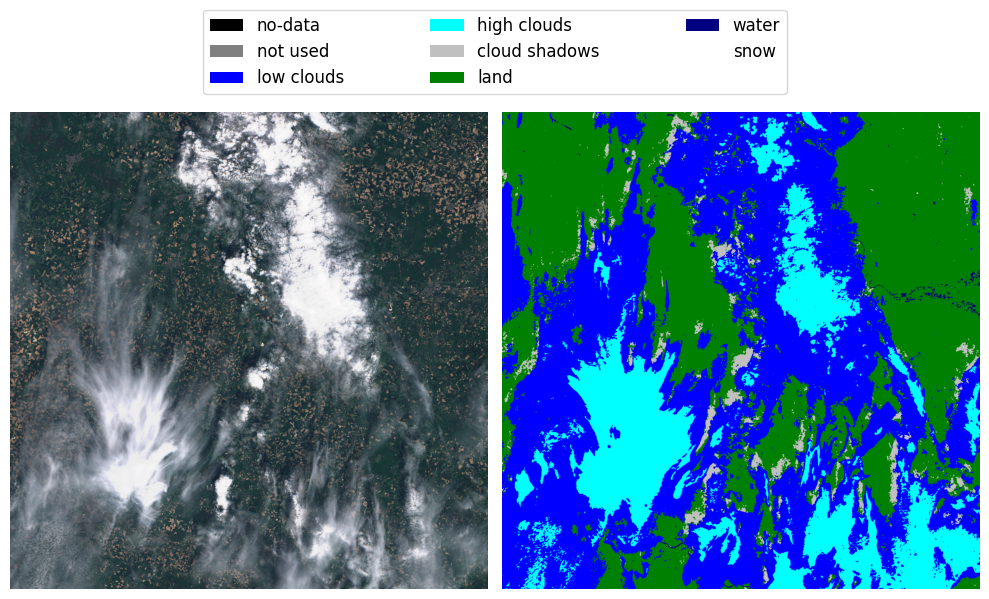

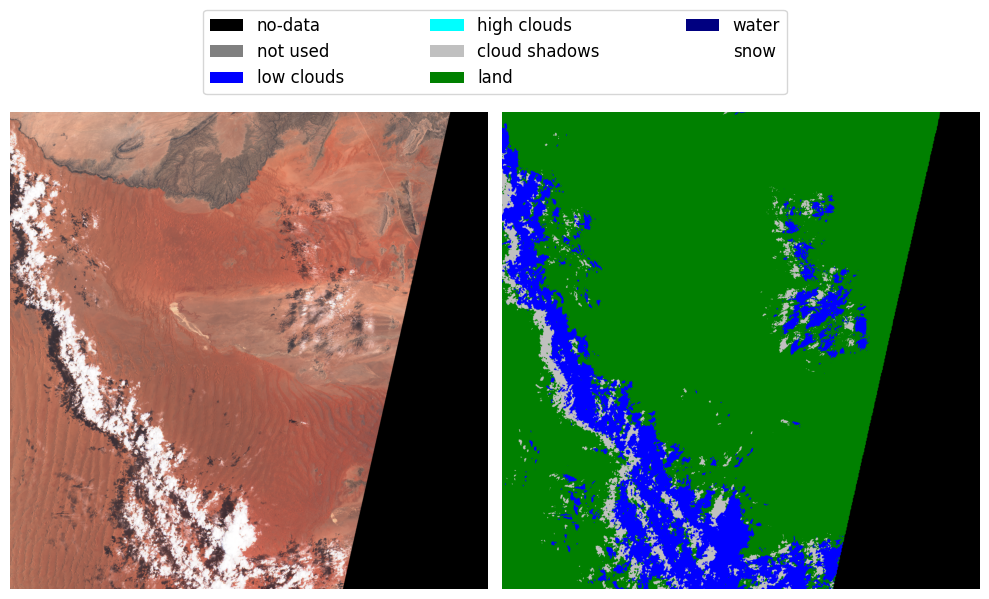

In [6]:
dataset_config = {
    "data_dir": "/home/dragik/data/CESBIO/CESBIO_old",
    "selection":"rgb"
}
dataset = CESBIODataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(11);

In [8]:
dataset.data_distribution_table()

,Number of pixels
no-data,17652712.0
not used,0.0
low clouds,12225490.0
high clouds,11152211.0
cloud shadows,2859373.0
land,73371336.0
water,2454514.0
snow,844762.0


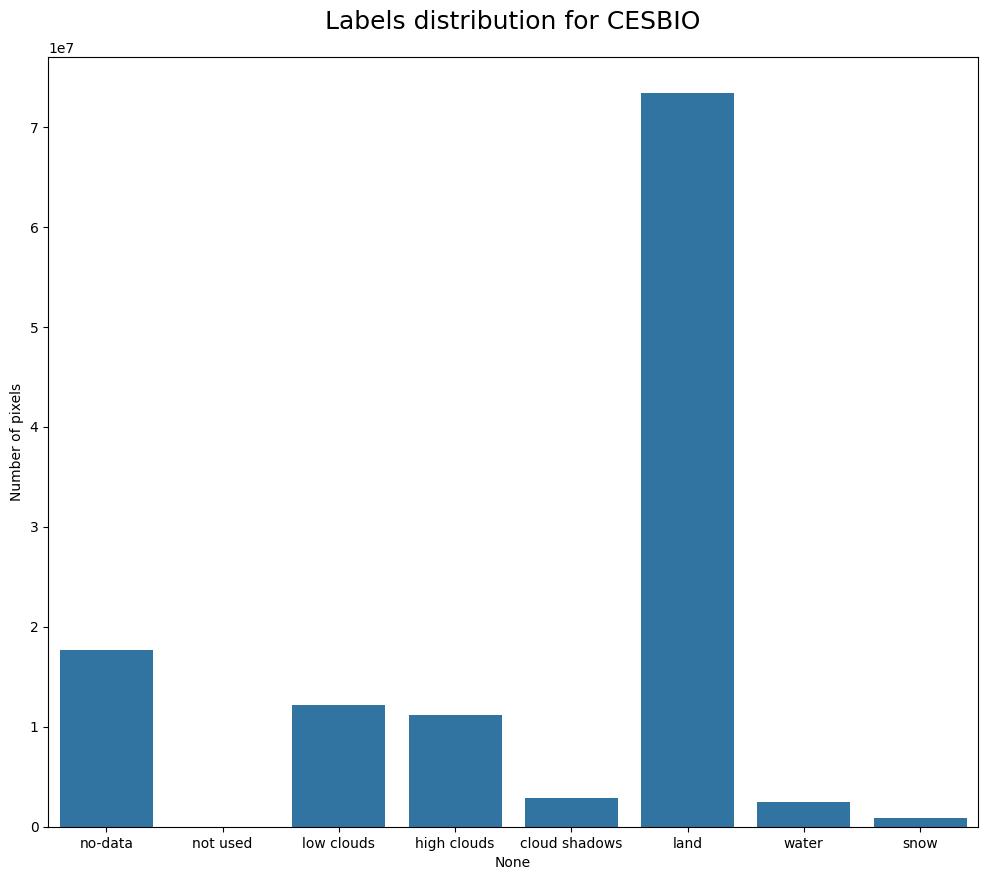

In [9]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/CESBIO/CESBIO_old",
    "selection":"rgb",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = CESBIODataset(train_dataset_config)
len(train_dataset)

35

## Create the model

In [8]:
epochs = 5
model_directory = "/home/dragik/data/CESBIO/CESBIO_old/experiments_rgb"
model_config = {
    "num_classes": 8, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [9]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.29s/it]

epoch: 1, time: 12, loss:  0.79297



testing on train set: 100%|███████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]

IOU:0.1699819229918572, IOU mean:0.1831232110431873, IOU per Class:[0.66120264 0.         0.15482382 0.08152728 0.00230135 0.54777408
 0.00927913 0.00807739]



training: 100%|███████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]

epoch: 2, time: 10, loss:  0.75551



testing on train set: 100%|███████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]

IOU:0.22905149644362913, IOU mean:0.2019698106582073, IOU per Class:[0.71710695 0.         0.17227913 0.09173549 0.00507089 0.58416832
 0.01516577 0.03023195]



training: 100%|███████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]

epoch: 3, time: 9, loss:  0.72519



testing on train set: 100%|███████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.09it/s]

IOU:0.2796726529343434, IOU mean:0.23627017433087022, IOU per Class:[0.7720652  0.         0.28836891 0.14296511 0.00337536 0.64578683
 0.02192462 0.01567536]



training: 100%|███████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]

epoch: 4, time: 8, loss:  0.71349



testing on train set: 100%|███████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]

IOU:0.311554738929361, IOU mean:0.2448775449280688, IOU per Class:[0.78520062 0.         0.24191475 0.19339266 0.00367014 0.67637376
 0.02937654 0.02909189]



training: 100%|███████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]

epoch: 5, time: 9, loss:  0.68717



testing on train set: 100%|███████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.04it/s]

IOU:0.3364685085435529, IOU mean:0.2627041474378792, IOU per Class:[0.7999643  0.         0.21901684 0.2163731  0.00516141 0.70077065
 0.05810275 0.10224414]


Train loss: [0.7516899142946516, 0.7109973192214966, 0.6896499650818961, 0.6668500593730382, 0.659005926336561]
Validation loss: []
Train time per epochs: [12, 10, 9, 8, 9]
Finished training. training time: 48


# Working with the 13 bands of Sentinel-2

## Load training data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/CESBIO/CESBIO_old",
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = CESBIODataset(train_dataset_config)
len(train_dataset)

35

## Create the model

In [8]:
epochs = 5
model_directory = "/home/dragik/data/CESBIO/CESBIO_old/experiments"
model_config = {
    "num_classes": 8, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [ ]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|██████████████████████████████████████████████████████████████████████████| 9/9 [46:59<00:00, 313.27s/it]

epoch: 1, time: 2819, loss:  0.74968



testing on train set: 100%|██████████████████████████████████████████████████████████████| 9/9 [45:40<00:00, 304.53s/it]

IOU:0.05851331083474168, IOU mean:0.04151508728428467, IOU per Class:[0.14101828 0.         0.04947211 0.08982372 0.00122473 0.02869483
 0.01112081 0.01076621]



training: 100%|██████████████████████████████████████████████████████████████████████████| 9/9 [44:35<00:00, 297.29s/it]

epoch: 2, time: 2676, loss:  0.68558



training: 100%|██████████████████████████████████████████████████████████████████████████| 9/9 [44:31<00:00, 296.85s/it]

epoch: 3, time: 2671, loss:  0.65639



testing on train set: 100%|██████████████████████████████████████████████████████████████| 9/9 [44:37<00:00, 297.46s/it]

IOU:0.17603609435762893, IOU mean:0.11172130792666717, IOU per Class:[0.21296884 0.         0.12413325 0.16598755 0.00291695 0.32542382
 0.01117701 0.05116304]



training: 100%|██████████████████████████████████████████████████████████████████████████| 9/9 [44:34<00:00, 297.17s/it]

epoch: 4, time: 2675, loss:  0.62656



testing on train set: 100%|██████████████████████████████████████████████████████████████| 9/9 [44:30<00:00, 296.67s/it]

IOU:0.18776864865237172, IOU mean:0.12167944071449173, IOU per Class:[0.23797897 0.         0.10888062 0.12337838 0.00312682 0.44822856
 0.01317278 0.03866939]



training: 100%|██████████████████████████████████████████████████████████████████████████| 9/9 [44:29<00:00, 296.65s/it]

epoch: 5, time: 2670, loss:  0.61360



testing on train set:  78%|████████████████████████████████████████████████▏             | 7/9 [35:37<10:11, 305.61s/it]